<a href="https://colab.research.google.com/github/ngotancuong/datamining/blob/main/H2O_AutoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link to supporting video for below notebook walkhthrough - https://www.youtube.com/watch?v=91QljBnvM7s

In [ ]:
#this command might be relevant ony on GPU nodes. But the notebook will run on CPU as well
#If running on CPU remove the command wherever it appears
!nvidia-smi

Sun Sep 17 05:23:46 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  default-jre-headless fonts-dejavu-core fonts-dejavu-extra
  libatk-wrapper-java libatk-wrapper-java-jni libfontenc1 libxkbfile1 libxtst6
  libxxf86dga1 openjdk-11-jre x11-utils
Suggested packages:
  mesa-utils
The following NEW packages will be installed:
  default-jre default-jre-headless fonts-dejavu-core fonts-dejavu-extra
  libatk-wrapper-java libatk-wrapper-java-jni libfontenc1 libxkbfile1 libxtst6
  libxxf86dga1 openjdk-11-jre x11-utils
0 upgraded, 12 newly installed, 0 to remove and 17 not upgraded.
Need to get 3,720 kB of archives.
After this operation, 12.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 default-jre-headless amd64 2:1.11-72build2 [3,042 B]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxtst6 amd64 2:1.2.3-1build4 [13.4 kB]
Get:3 http://archive.ubuntu

In [ ]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 MB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.42.0.3-py2.py3-none-any.whl size=240945068 sha256=795197df852debdb10bf02b1f5b3cc7ef8c77f133819d93d9bff4e6c7004ebf5
  Stored in directory: /root/.cache/pip/wheels/f9/7d/1d/e1258f0558603969a8393cb5b22a18e313337f01627a118302
Successfully built h2o


In [ ]:
import h2o

In [ ]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20.1" 2023-08-24; OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp0da_0s1y
  JVM stdout: /tmp/tmp0da_0s1y/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp0da_0s1y/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.3
H2O_cluster_version_age:,25 days
H2O_cluster_name:,H2O_from_python_unknownUser_x503iw
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
from h2o.automl import H2OAutoML

In [ ]:
churn_df = h2o.import_file('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
churn_df.types

{'customerID': 'string',
 'gender': 'enum',
 'SeniorCitizen': 'int',
 'Partner': 'enum',
 'Dependents': 'enum',
 'tenure': 'int',
 'PhoneService': 'enum',
 'MultipleLines': 'enum',
 'InternetService': 'enum',
 'OnlineSecurity': 'enum',
 'OnlineBackup': 'enum',
 'DeviceProtection': 'enum',
 'TechSupport': 'enum',
 'StreamingTV': 'enum',
 'StreamingMovies': 'enum',
 'Contract': 'enum',
 'PaperlessBilling': 'enum',
 'PaymentMethod': 'enum',
 'MonthlyCharges': 'real',
 'TotalCharges': 'real',
 'Churn': 'enum'}

In [ ]:
churn_df.describe()

Rows:7043
Cols:21

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
type,string,enum,int,enum,enum,int,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,real,real,enum
mins,NaN,,0.0,,,0.0,,,,,,,,,,,,,18.25,18.8,
mean,NaN,,0.1621468124378816,,,32.37114865824223,,,,,,,,,,,,,64.76169246059916,2283.300440841865,
maxs,NaN,,1.0,,,72.0,,,,,,,,,,,,,118.75,8684.8,
sigma,NaN,,0.3686116056100131,,,24.559481023094456,,,,,,,,,,,,,30.090047097678482,2266.771361883145,
zeros,0,,5901,,,11,,,,,,,,,,,,,0,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [ ]:
churn_train,churn_test,churn_valid = churn_df.split_frame(ratios=[.7, .15])

In [ ]:
churn_train

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.1,1949.4,No
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.8,3046.05,Yes
9763-GRSKD,Male,0,Yes,Yes,13,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No
7469-LKBCI,Male,0,No,No,16,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.8,No
0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.7,5036.3,Yes
5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.5,2686.05,No


In [ ]:
y = "Churn"
x = churn_df.columns
x.remove(y)
x.remove("customerID")

In [ ]:
aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble", "DeepLearning"], verbosity="info", nfolds=0)


In [ ]:
!nvidia-smi

Sun Sep 17 05:25:53 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
aml.train(x = x, y = y, training_frame = churn_train, validation_frame=churn_valid)

AutoML progress: |
05:25:55.644: Project: AutoML_1_20230917_52555
05:25:55.645: Cross-validation disabled by user: no fold column nor nfolds > 1.
05:25:55.645: Setting stopping tolerance adaptively based on the training frame: 0.01426389847107313
05:25:55.645: Build control seed: 10
05:25:55.646: training frame: Frame key: AutoML_1_20230917_52555_training_py_2_sid_8718    cols: 21    rows: 4915  chunks: 8    size: 265801  checksum: 4940189847146833397
05:25:55.646: validation frame: Frame key: py_4_sid_8718    cols: 21    rows: 1097  chunks: 8    size: 140279  checksum: 8022647032278952471
05:25:55.647: leaderboard frame: Frame key: py_4_sid_8718    cols: 21    rows: 1097  chunks: 8    size: 140279  checksum: 8022647032278952471
05:25:55.647: blending frame: NULL
05:25:55.647: response column: Churn
05:25:55.647: fold column: null
05:25:55.647: weights column: null
05:25:55.667: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), l

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_1_AutoML_1_20230917_52555


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    55                 55                          23441                  7            15           9.09091       26            31            29.1273

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.1181587349281737
RMSE: 0.3437422507172688
LogLoss: 0.3666664446482939
Mean Per-Class Error: 0.2033715721049989
AUC: 0.8878143357554624
AUCPR: 0.7328742630743338
Gini: 0.7756286715109248

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.35910787348437945
       No    Yes    Error    Rate
-----  ----  -----  -------  --------------
No     3012  601    0.1663   (601.0/3613.0)
Yes    313   989    0.2404   (313.0/1302.0)
Total  3325  1590   0.186    (914.0/4915.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.359108     0.683956  204
max f2                       0.200641     0.790698  276
max f0point5                 0.510956     0.69065   139
max accuracy                 0.510956     0.829095  139
max precision                0.909258     1         0
max recall                   0.0162543    1         388
max specificity              0.909258     1         0
max absolute_mcc             0.359108     0.559613  204
max min_per_class_accuracy   0.31409      0.798229  224
max mean_per_class_accuracy  0.249212     0.807488  252
max tns                      0.909258     3613      0
max fns                      0.909258     1301      0
max fps                      0.00529279   3613      399
max tps                      0.0162543    1302      388
max tnr                      0.909258     1         0
max fnr                      0.909258     0.999232  0
max fpr                      0.00529279   1         399
max tpr                      0.0162543    1         388

Gains/Lift Table: Avg response rate: 26.49 %, avg score: 26.53 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0101729                   0.864847           3.62396    3.62396            0.96             0.88219    0.96                        0.88219             0.0368664       0.0368664                  262.396   262.396            0.0363128
2        0.0201424                   0.850991           3.38976    3.50805            0.897959         0.858335   0.929293                    0.870383            0.0337942       0.0706605                  238.976   250.805            0.0687231
3        0.0301119                   0.828784           3.15864    3.39236            0.836735         0.842991   0.898649                    0.861314            0.03149         0.102151                   215.864   239.236            0.0979989
4        0.0400814                   0.804812           3.15864    3.33423            0.836735         0.816819   0.883249                    0.850247            0.03149         0.133641                   215.864   233.423            0.127275
5        0.0500509                   0.773937           3.23568    3.3146             0.857143         0.791166   0.878049               

In [ ]:
!nvidia-smi

Sun Sep 17 05:27:31 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P0    27W /  70W |    179MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
lb = aml.leaderboard

In [ ]:
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_1_AutoML_1_20230917_52555,0.869075,0.382459,0.703517,0.215936,0.35034,0.122738
GLM_1_AutoML_1_20230917_52555,0.86229,0.391122,0.674081,0.221134,0.356109,0.126814
GBM_3_AutoML_1_20230917_52555,0.860323,0.39209,0.686828,0.241506,0.356407,0.127026
GBM_2_AutoML_1_20230917_52555,0.858817,0.393224,0.68254,0.225107,0.356528,0.127112
XGBoost_3_AutoML_1_20230917_52555,0.858472,0.391463,0.700544,0.225577,0.354621,0.125756
XGBoost_1_AutoML_1_20230917_52555,0.856649,0.394564,0.679195,0.226432,0.357539,0.127834
GBM_4_AutoML_1_20230917_52555,0.855499,0.398556,0.675984,0.231747,0.359605,0.129316
XRT_1_AutoML_1_20230917_52555,0.854835,0.401625,0.68562,0.219147,0.359116,0.128964
DRF_1_AutoML_1_20230917_52555,0.841467,0.435559,0.669005,0.264268,0.363436,0.132086
XGBoost_2_AutoML_1_20230917_52555,0.835789,0.424347,0.632465,0.253226,0.371809,0.138242


In [ ]:
churn_pred=aml.leader.predict(churn_test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [ ]:
churn_pred.head()

predict,No,Yes
Yes,0.592348,0.407652
No,0.951991,0.0480086
Yes,0.186341,0.813659
No,0.81305,0.18695
Yes,0.158306,0.841694
No,0.909248,0.0907516
No,0.963126,0.0368737
Yes,0.600585,0.399415
Yes,0.227067,0.772933
Yes,0.482062,0.517938


In [ ]:
aml.leader.model_performance(churn_test)

ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.13589681929853753
RMSE: 0.36864185776785785
LogLoss: 0.4227079841262714
Mean Per-Class Error: 0.23865956689520812
AUC: 0.8450390581094751
AUCPR: 0.6951429052905982
Gini: 0.6900781162189502

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3563369598517147
       No    Yes    Error    Rate
-----  ----  -----  -------  --------------
No     617   127    0.1707   (127.0/744.0)
Yes    88    199    0.3066   (88.0/287.0)
Total  705   326    0.2085   (215.0/1031.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.356337     0.649266  186
max f2                       0.10099      0.756396  322
max f0point5                 0.487376     0.677672  132
max accuracy                 0.449549     0.815713  146
max precision                0.908742     1         0
max recall                   0.0105457    1         394
max specificity              0.908742     1         0
max absolute_mcc             0.449549     0.52112   146
max min_per_class_accuracy   0.28418      0.763441  223
max mean_per_class_accuracy  0.282637     0.766066  224
max tns                      0.908742     744       0
max fns                      0.908742     286       0
max fps                      0.00528361   744       399
max tps                      0.0105457    287       394
max tnr                      0.908742     1         0
max fnr                      0.908742     0.996516  0
max fpr                      0.00528361   1         399
max tpr                      0.0105457    1         394

Gains/Lift Table: Avg response rate: 27.84 %, avg score: 26.47 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0106693                   0.860861           3.26576    3.26576            0.909091         0.88709    0.909091                    0.88709             0.0348432       0.0348432                  226.576   226.576            0.0334991
2        0.0203686                   0.838214           3.59233    3.42127            1                0.848688   0.952381                    0.868803            0.0348432       0.0696864                  259.233   242.127            0.0683423
3        0.0300679                   0.819088           3.2331     3.36057            0.9              0.831589   0.935484                    0.856799            0.0313589       0.101045                   223.31    236.057            0.0983571
4        0.0407371                   0.795008           2.93918    3.25021            0.818182         0.809285   0.904762                    0.844354            0.0313589       0.132404                   193.918   225.021            0.127028
5        0.0504365                   0.772586           2.51463    3.10875            0.7              0.781762   0.865385                    0.832318            0.0243902       0.156794                   151.463   210.875            0.147386
6        0.100873                    0.659703           2.76333    2.93604            0.769231         0.722028   0.817308                    0.777173            0.139373        0.296167                   176.333   193.604            0.27063
7        0.150339                    0.577974           2.18358    2.68846            0.607843         0.613847   0.748387                    0.723433            0.108014        0.404181                   118.358   168.846            0.351762
8        0.20077

In [ ]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
#se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
#metalearner = h2o.get_model(se.metalearner()['name'])

In [ ]:
model_ids

['GBM_1_AutoML_1_20230917_52555',
 'GLM_1_AutoML_1_20230917_52555',
 'GBM_3_AutoML_1_20230917_52555',
 'GBM_2_AutoML_1_20230917_52555',
 'XGBoost_3_AutoML_1_20230917_52555',
 'XGBoost_1_AutoML_1_20230917_52555',
 'GBM_4_AutoML_1_20230917_52555',
 'XRT_1_AutoML_1_20230917_52555',
 'DRF_1_AutoML_1_20230917_52555',
 'XGBoost_2_AutoML_1_20230917_52555']

In [ ]:
h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_3_AutoML_1_20230917_52555


Model Summary: 
    number_of_trees
--  -----------------
    35

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.10680623264798403
RMSE: 0.32681222842480057
LogLoss: 0.3380711346947353
Mean Per-Class Error: 0.18039897315675643
AUC: 0.908757333455779
AUCPR: 0.7841909507313299
Gini: 0.817514666911558

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.40413856277099025
       No    Yes    Error    Rate
-----  ----  -----  -------  --------------
No     3178  435    0.1204   (435.0/3613.0)
Yes    313   989    0.2404   (313.0/1302.0)
Total  3491  1424   0.1522   (748.0/4915.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.404139     0.725605  188
max f2                       0.208287     0.811247  270
max f0point5                 0.558803     0.731631  127
max accuracy                 0.481759     0.849237  158
max precision                0.968871     1         0
max recall                   0.0113348    1         389
max specificity              0.968871     1         0
max absolute_mcc             0.404139     0.621796  188
max min_per_class_accuracy   0.33184      0.827189  217
max mean_per_class_accuracy  0.270011     0.83127   242
max tns                      0.968871     3613      0
max fns                      0.968871     1301      0
max fps                      0.00241981   3613      399
max tps                      0.0113348    1302      389
max tnr                      0.968871     1         0
max fnr                      0.968871     0.999232  0
max fpr                      0.00241981   1         399
max tpr                      0.0113348    1         389

Gains/Lift Table: Avg response rate: 26.49 %, avg score: 26.58 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0103764                   0.90071            3.62692    3.62692            0.960784         0.923       0.960784                    0.923               0.0376344       0.0376344                  262.692   262.692            0.0370809
2        0.0201424                   0.877392           3.69632    3.66057            0.979167         0.888611    0.969697                    0.906327            0.0360983       0.0737327                  269.632   266.057            0.0729024
3        0.0301119                   0.846611           3.62088    3.64743            0.959184         0.859393    0.966216                    0.890788            0.0360983       0.109831                   262.088   264.743            0.108447
4        0.0400814                   0.810506           3.15864    3.52585            0.836735         0.82907     0.93401                     0.875437            0.03149         0.141321                   215.864   252.585            0.137723
5        0.0500509                   0.793011           3.38976    3.49874            0.897959         0.80128     0.926829                    0.860666            0.0337942       0.175115                   238.976   249.874            0.170133
6        0.100102                    0.681539           3.16115    3.32995            0.837398         0.737341    0.882114                    0.799003            0.158218        0.333333                   216.115   232.995            0.31728
7        0.150153                    0.599179           2.73148    3.13046

In [ ]:
out = h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

In [ ]:
out.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'XGBoost_3_AutoML_1_20230917_52555',
   'type': 'Key<Model>',
   'URL': '/3/Models/XGBoost_3_AutoML_1_20230917_52555'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20230917_52555_training_py_2_sid_8718',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20230917_52555_training_py_2_sid_8718'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20230917_52555_training_py_2_sid_8718',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20230917_52555_training_py_2_sid_8718'}},
 'validation_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type

In [ ]:
out.convert_H2OXGBoostParams_2_XGBoostParams()

({'silent': True,
  'eta': 0.3,
  'colsample_bylevel': 0.8,
  'objective': 'binary:logistic',
  'min_child_weight': 3.0,
  'nthread': 2,
  'seed': 18,
  'max_bin': 256,
  'max_depth': 5,
  'colsample_bytree': 0.8,
  'lambda': 1.0,
  'gamma': 0.0,
  'gpu_id': 0,
  'alpha': 0.0,
  'booster': 'gbtree',
  'grow_policy': 'depthwise',
  'nround': 10000,
  'subsample': 0.8,
  'max_delta_step': 0.0,
  'tree_method': 'gpu_hist'},
 35)

In [ ]:
out

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_3_AutoML_1_20230917_52555


Model Summary: 
    number_of_trees
--  -----------------
    35

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.10680623264798403
RMSE: 0.32681222842480057
LogLoss: 0.3380711346947353
Mean Per-Class Error: 0.18039897315675643
AUC: 0.908757333455779
AUCPR: 0.7841909507313299
Gini: 0.817514666911558

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.40413856277099025
       No    Yes    Error    Rate
-----  ----  -----  -------  --------------
No     3178  435    0.1204   (435.0/3613.0)
Yes    313   989    0.2404   (313.0/1302.0)
Total  3491  1424   0.1522   (748.0/4915.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.404139     0.725605  188
max f2                       0.208287     0.811247  270
max f0point5                 0.558803     0.731631  127
max accuracy                 0.481759     0.849237  158
max precision                0.968871     1         0
max recall                   0.0113348    1         389
max specificity              0.968871     1         0
max absolute_mcc             0.404139     0.621796  188
max min_per_class_accuracy   0.33184      0.827189  217
max mean_per_class_accuracy  0.270011     0.83127   242
max tns                      0.968871     3613      0
max fns                      0.968871     1301      0
max fps                      0.00241981   3613      399
max tps                      0.0113348    1302      389
max tnr                      0.968871     1         0
max fnr                      0.968871     0.999232  0
max fpr                      0.00241981   1         399
max tpr                      0.0113348    1         389

Gains/Lift Table: Avg response rate: 26.49 %, avg score: 26.58 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0103764                   0.90071            3.62692    3.62692            0.960784         0.923       0.960784                    0.923               0.0376344       0.0376344                  262.692   262.692            0.0370809
2        0.0201424                   0.877392           3.69632    3.66057            0.979167         0.888611    0.969697                    0.906327            0.0360983       0.0737327                  269.632   266.057            0.0729024
3        0.0301119                   0.846611           3.62088    3.64743            0.959184         0.859393    0.966216                    0.890788            0.0360983       0.109831                   262.088   264.743            0.108447
4        0.0400814                   0.810506           3.15864    3.52585            0.836735         0.82907     0.93401                     0.875437            0.03149         0.141321                   215.864   252.585            0.137723
5        0.0500509                   0.793011           3.38976    3.49874            0.897959         0.80128     0.926829                    0.860666            0.0337942       0.175115                   238.976   249.874            0.170133
6        0.100102                    0.681539           3.16115    3.32995            0.837398         0.737341    0.882114                    0.799003            0.158218        0.333333                   216.115   232.995            0.31728
7        0.150153                    0.599179           2.73148    3.13046

In [ ]:
out_gbm = h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])

In [ ]:
out.confusion_matrix()

,No,Yes,Error,Rate
No,3178.0,435.0,0.1204,(435.0/3613.0)
Yes,313.0,989.0,0.2404,(313.0/1302.0)
Total,3491.0,1424.0,0.1522,(748.0/4915.0)


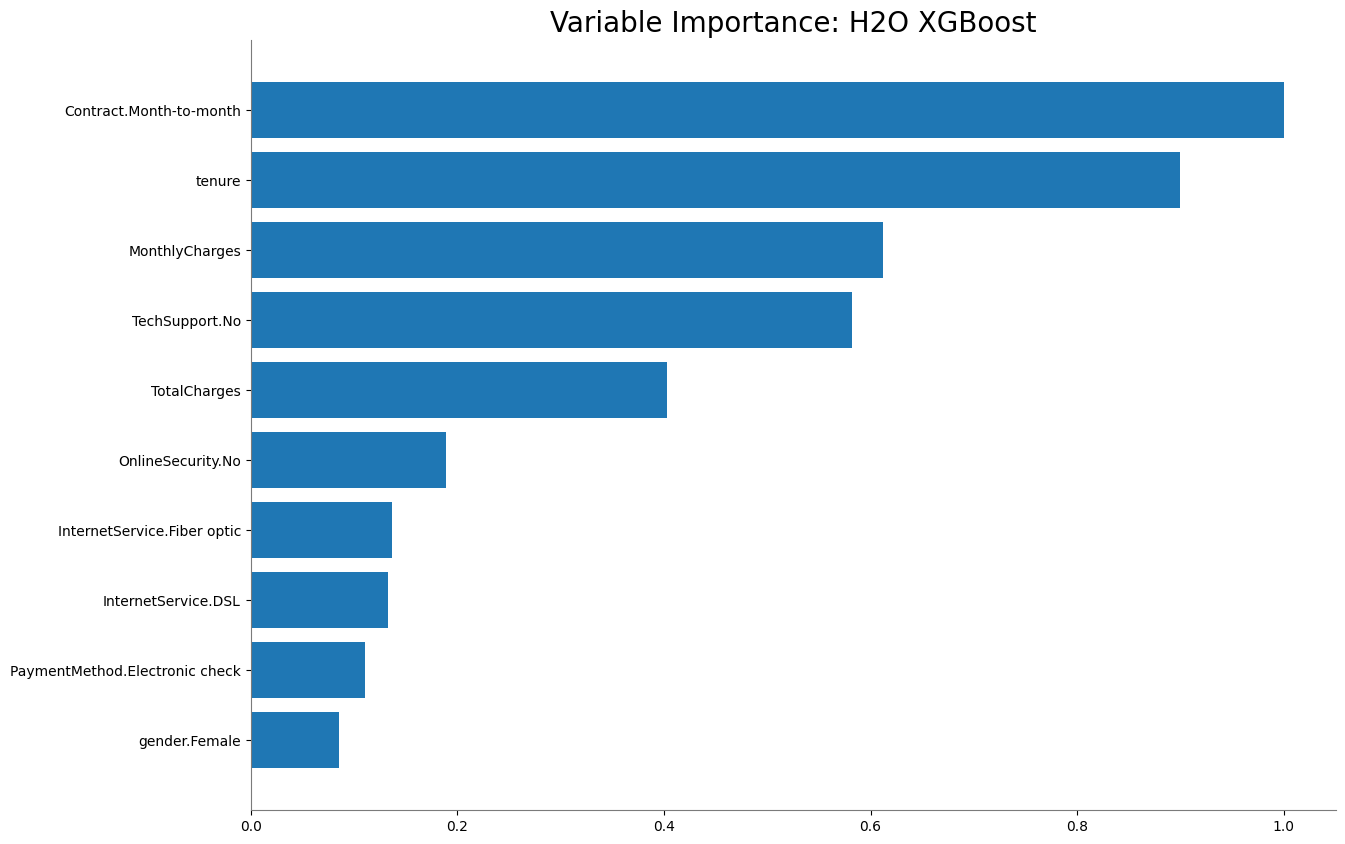

<Figure size 640x480 with 0 Axes>

In [ ]:
out.varimp_plot()

In [ ]:
aml.leader.download_mojo(path = "./")

'/content/GBM_1_AutoML_1_20230917_52555.zip'